In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# read in data
path_to_data = '../../data/sampling/water_iso/'

# set filenames
filename1 = 'water_iso_values.csv'
filename2 = 'water_iso_values_set.csv'

# read in data
df1 = pd.read_csv(path_to_data + filename1)
df2 = pd.read_csv(path_to_data + filename2)

In [10]:
# Check if each entry in 'ID' of df1 has a corresponding entry in 'id1' of df2
df1_ids = set(df1['ID'])
df2_ids = set(df2['ID'])

# Find IDs that are in df1 but not in df2
missing_in_df2 = df1_ids - df2_ids

# Find IDs that are in df2 but not in df1
missing_in_df1 = df2_ids - df1_ids

# Check if there are any missing IDs
if not missing_in_df2 and not missing_in_df1:
    print("Each entry in 'ID' of df1 has one and only one corresponding entry in 'id1' of df2.")
else:
    if missing_in_df2:
        print(f"IDs in df1 but not in df2: {missing_in_df2}")
    if missing_in_df1:
        print(f"IDs in df2 but not in df1: {missing_in_df1}")

Each entry in 'ID' of df1 has one and only one corresponding entry in 'id1' of df2.


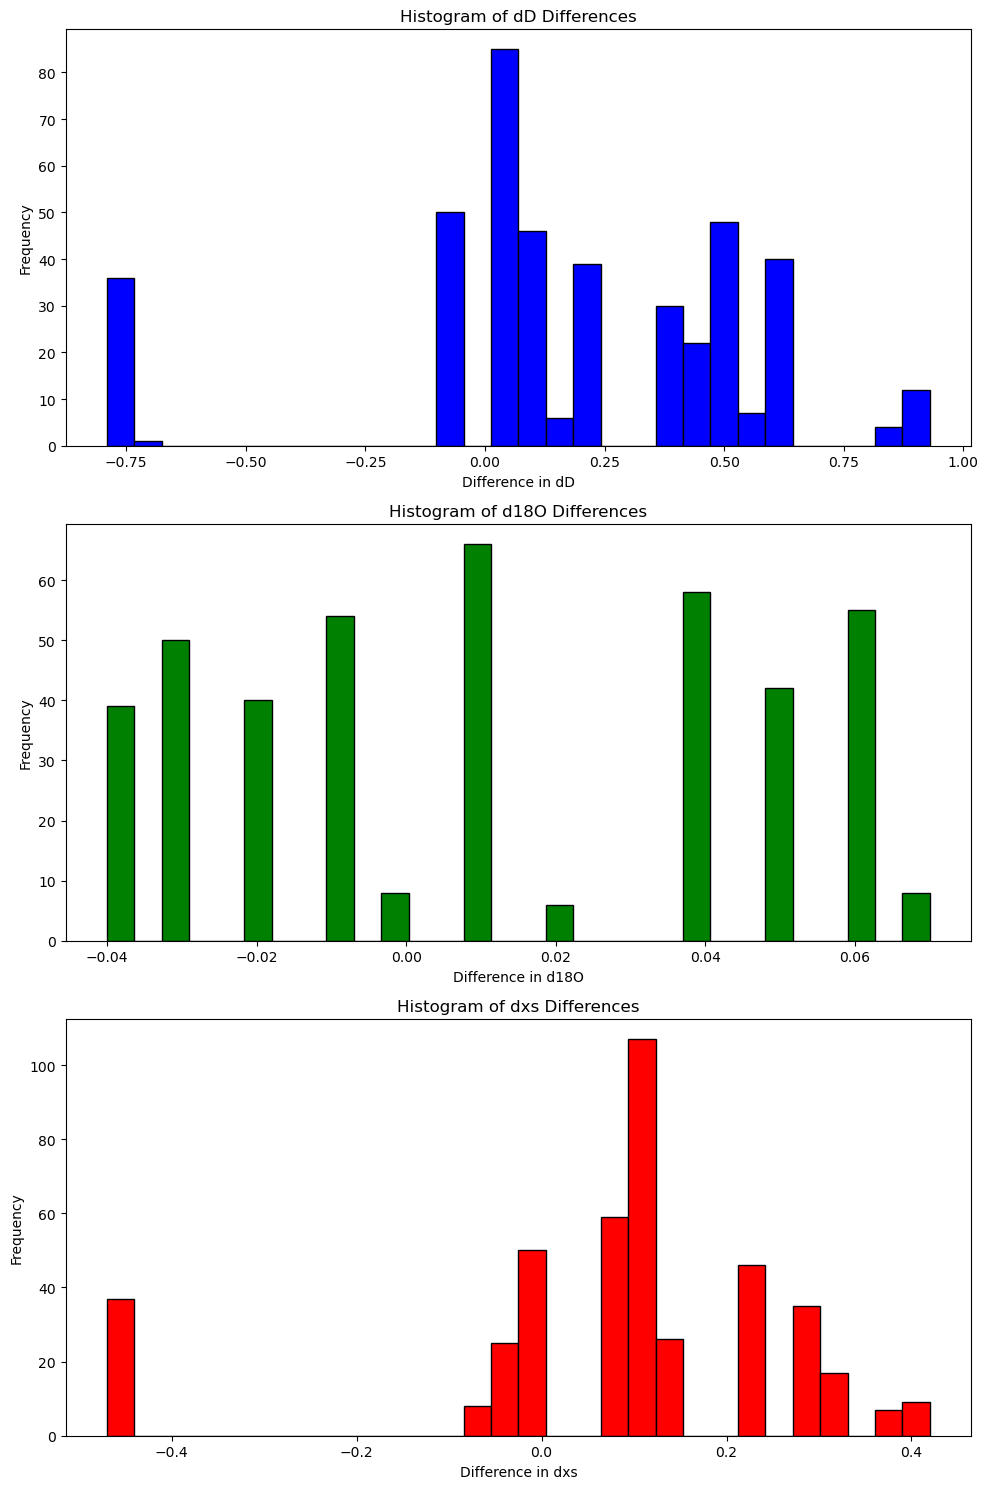

In [11]:
# Calculate the differences between each pair of values in the dD, d18O, and dxs columns
df1_sorted = df1.sort_values(by='ID').reset_index(drop=True)
df2_sorted = df2.sort_values(by='ID').reset_index(drop=True)

dD_diff = df1_sorted['dD'] - df2_sorted['dD']
d18O_diff = df1_sorted['d18O'] - df2_sorted['d18O']
dxs_diff = df1_sorted['dxs'] - df2_sorted['dxs']

# Plot histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].hist(dD_diff, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Histogram of dD Differences')
axes[0].set_xlabel('Difference in dD')
axes[0].set_ylabel('Frequency')

axes[1].hist(d18O_diff, bins=30, color='green', edgecolor='black')
axes[1].set_title('Histogram of d18O Differences')
axes[1].set_xlabel('Difference in d18O')
axes[1].set_ylabel('Frequency')

axes[2].hist(dxs_diff, bins=30, color='red', edgecolor='black')
axes[2].set_title('Histogram of dxs Differences')
axes[2].set_xlabel('Difference in dxs')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()